# **Problem description**

Assume we want to minimise $f(x_1,x_2)=(x_1^2+x_2^2)$, but we don’t know the specific form of the function (this is a simplified case that may represent a unit operation or process). 
Not knowing the form of a function makes it difficult to optimise.

We first sample it at $x_1=3,x_2=2$ and get $f(3,2)=13$. We can do this as many times as we want for values of $x_1,x_2$. Using many of these values we can use some other function (a neural network, a gaussian process, a quadratic function) to fit our inputs $(x_1,x_2)_i$ to our outputs $f_i$, where $i$ is an individual evaluation. 

This new function, $\hat{f}$, is an approximation of the function $f$. 

Because we have a mathematical expression for $\hat{f}$ and know it's derivatives and we can now optimise efficiently.

Assume we locate a set of optimal values $x_1^*$ and $x_2^*$ which minimise $\hat{f}$. We then input these two values into $f$, i.e. $f(x^*, y^*)$.

If $||f_{approx}(x^*, y^*) - f(x^*, y^*)||\leq \text{tol}$, It means our approximate function is close enough to our real function, and since you have optimised your approximate function, we can assume that we have optimised our underlying function $f$. If however, the difference between your true function $f$ and your approximate function $\hat{f}$ at $x_1^*, x_2^*$ is still large then you continue to sample, and repeat the process until you have a small error. Notice that where, and how to sample our underlying function is a whole issue in itself.

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# **Rosenbrock Function**

$$f(x,y) = 100  (y-x^2)^2 + (1-x)^2$$

In [ ]:
#This is the function that we can only see the outputs
def rosenbrock(x):
    #x = x.squeeze()
    return 100*(x[1,:]-x[0,:]**2)**2 + (1-x[0,:])**2

## **Plotting routines**

The below code allows to visualize the function.

In [ ]:
n_points = 100                                          # Number of data-points
# Generate input data
x_1      = np.linspace(-10.048, 10.048, n_points)         
x_2      = np.linspace(-10.048, 10.048, n_points)
x        = [[x,y] for x in x_1 for y in x_2]
x        = np.array(x)
x        = x.T
# Compute the output
f        = rosenbrock(x)


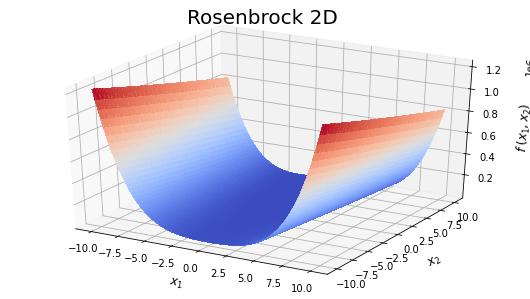

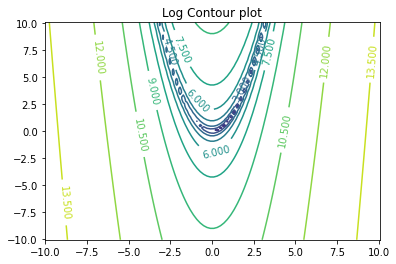

In [ ]:
# importing libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# setting up plot
fig = plt.figure()
fig.set_size_inches(18.5/2, 10.5/2)
ax = fig.add_subplot(111, projection='3d')

# labels and titles
plt.title('Rosenbrock 2D ', fontsize=20)
ax.set_xlabel(r'$\mathit{x_1}$', fontsize=12, labelpad=10)
ax.set_ylabel(r'$\mathit{x_2}$', fontsize=12, labelpad=10)
ax.set_zlabel(r'$\mathit{f\;(x_1,x_2)}$', fontsize=12, labelpad=10)


# plot
ax.plot_trisurf(x[0,:], x[1,:], f, cmap=cm.coolwarm, 
                linewidth=0, antialiased=False, alpha=0.8)
plt.show()

# Contour plot
f_copy = f.reshape((n_points,n_points), order='F')

fig, ax = plt.subplots()
CS = ax.contour(x_1, x_2, np.log(f_copy), 15)
#ax.clabel(CS, inline=1, fontsize=10)
ax.clabel(CS, fontsize=10)
ax.set_title('Log Contour plot')
plt.show()

## Your code

Create an algorithm that samples the function, and fits a quadratic expression (e.g. $f_{approx}:=e+ax+by+cx^2+dy^2$) to optimise the quadratic and the rosebrock functions. Your algorithm shoud look something like:

$Quadratic-fitting~ algorithm$

**Input**: Initial function bounds ${\bf x}^{ub},{\bf x}^{lb}$, define number of samples per iteration $n_s$, define number of iterations $n_i$, define a true function $f$ (for example $100  (y-x^2)^2 + (1-x)^2$ -  which you assume to be unknown), and some "machine learning" or "surrogate" function $f_{approx}$ (for example $f_{approx}:=e+ax+by+cx^2+dy^2$) 

**1**: Randomly sample your function $n_s$ times within some bounds ${\bf x}^{ub},{\bf x}^{lb}$ 

**For** $i$ in $n_i$ iterations **Do**:

>**1**: Sample your true function $f$ randomly $n_s$ times within some bounds ${\bf x}^{ub}_i,{\bf x}^{lb}_i$ 

>**2**: Use the samples $n_s$ to determine coefficients from your approximate function $f_{approx}$. This is generally done as some optimization problem e.g.:

>>**2.1 Least Squares** $$\min_{a,b,c,d,e} \quad \sum_{i=1}^{n_s}(f({\bf x}_i)-f_{approx}({\bf x}_i,a,b,c,d,e))^2$$

>**3**: Optimise your approximate function $f_{approx}$ e.g.:

>>**3.1 Surrogate or ML function minimisation** $${\bf x}_i^*:=\text{arg}\min_{\bf x} \quad f_{approx}({\bf x})$$

>**4**: Centre your bounds around ${\bf x}_i^*$ and reduce ${\bf x}^{ub}_i,{\bf x}^{lb}_i$ e.g.:

>>**4.1 bound reduction** 
$${\bf x}^{ub}_{i+1}:={\bf x}_i^*+{\bf x}^{ub}_{i}/2$$
$${\bf x}^{lb}_{i+1}:={\bf x}_i^*-{\bf x}^{lb}_{i}/2$$


**note**: for the optimization in 2.1 you can use 

```
from scipy.optimize import minimize
```
similar to matlab's fmincon